In [ ]:
# Import libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from nltk import  sent_tokenize, word_tokenize
import nltk
from matplotlib.pyplot import figure

In [ ]:
# Read the CSV into a DataFrame

In [4]:
df=pd.read_csv('cleaned_harry_potter.csv') 

In [ ]:
# Implement the code that gets character list from wikipedia

In [5]:
import requests
from bs4 import BeautifulSoup

r = requests.get('https://en.wikipedia.org/wiki/List_of_Harry_Potter_characters')

soup = BeautifulSoup(r.text, 'html.parser')

first_ul = soup.ul

for x in range(0, 4):
    first_ul = first_ul.find_next("ul")

characters = []
for x in range(0, 23):
    li_item = first_ul.li
    for y in range(0, 20):
        if(li_item.a):
            characters.append(str(li_item.a.string))
        li_item = li_item.find_next("li")
    first_ul = first_ul.find_next("ul")

parsed_characters = []
for charracter in characters: 
    if ' ' in str(charracter) and \
    'Number' not in str(charracter) and \
    ',' not in str(charracter) and \
    ' and ' not in str(charracter) and \
    str(charracter) not in parsed_characters:
        parsed_characters.append(str(charracter))

In [6]:
parsed_characters

['Hannah Abbott',
 'Ludo Bagman',
 'Bathilda Bagshot',
 'Katie Bell',
 'Cuthbert Binns',
 'Phineas Nigellus Black',
 'Sirius Black',
 'Amelia Bones',
 'Susan Bones',
 'Terry Boot',
 'Lavender Brown',
 'Charity Burbage',
 'Frank Bryce',
 'Alecto Carrow',
 'Amycus Carrow',
 'Reginald Cattermole',
 'Cho Chang',
 'Percy Weasley',
 'Vincent Crabbe',
 'Colin Creevey',
 'Dennis Creevey',
 'Dirk Cresswell',
 'Barty Crouch Sr',
 'Barty Crouch Jr',
 'John Dawlish',
 'Fleur Delacour',
 'Gabrielle Delacour',
 'Dedalus Diggle',
 'Amos Diggory',
 'Cedric Diggory',
 'Elphias Doge',
 'Antonin Dolohov',
 'Aberforth Dumbledore',
 'Albus Dumbledore',
 'Ariana Dumbledore',
 'Dudley Dursley',
 'Marge Dursley',
 'Petunia Dursley',
 'Vernon Dursley',
 'Marietta Edgecombe',
 'Arabella Figg',
 'Argus Filch',
 'Justin Finch-Fletchley',
 'Seamus Finnigan',
 'Mundungus Fletcher',
 'Filius Flitwick',
 'Cornelius Fudge',
 'Marvolo Gaunt',
 'Merope Gaunt',
 'Morfin Gaunt',
 'Anthony Goldstein',
 'Gregory Goyle',
 'H

In [7]:
characters

['Hannah Abbott',
 'Ludo Bagman',
 'Bathilda Bagshot',
 'Katie Bell',
 'Cuthbert Binns',
 'Phineas Nigellus Black',
 'Sirius Black',
 'Amelia Bones',
 'Susan Bones',
 'Terry Boot',
 'Lavender Brown',
 'Slytherin',
 'Charity Burbage',
 'Frank Bryce',
 'Alecto Carrow',
 'Amycus Carrow',
 'Reginald Cattermole',
 'Cho Chang',
 'Percy Weasley',
 'Crabbe',
 'Ludo Bagman',
 'Bathilda Bagshot',
 'Katie Bell',
 'Cuthbert Binns',
 'Phineas Nigellus Black',
 'Sirius Black',
 'Amelia Bones',
 'Susan Bones',
 'Terry Boot',
 'Lavender Brown',
 'Slytherin',
 'Charity Burbage',
 'Frank Bryce',
 'Alecto Carrow',
 'Amycus Carrow',
 'Reginald Cattermole',
 'Cho Chang',
 'Percy Weasley',
 'Crabbe',
 'Vincent Crabbe',
 'Alecto Carrow',
 'Amycus Carrow',
 'Reginald Cattermole',
 'Cho Chang',
 'Percy Weasley',
 'Crabbe',
 'Vincent Crabbe',
 'Colin Creevey',
 'Dennis Creevey',
 'Dirk Cresswell',
 'Barty Crouch Sr',
 'Barty Crouch Jr',
 'John Dawlish',
 'Fleur Delacour',
 'Gabrielle Delacour',
 'Dedalus Diggle

In [ ]:
# Get set of names

In [8]:
parsed_characters_updated=[]
for string in parsed_characters:
    new_string = string.replace("(Mad-Eye)", "Mad-Eye")
    parsed_characters_updated.append(new_string)

print(parsed_characters_updated)

['Hannah Abbott', 'Ludo Bagman', 'Bathilda Bagshot', 'Katie Bell', 'Cuthbert Binns', 'Phineas Nigellus Black', 'Sirius Black', 'Amelia Bones', 'Susan Bones', 'Terry Boot', 'Lavender Brown', 'Charity Burbage', 'Frank Bryce', 'Alecto Carrow', 'Amycus Carrow', 'Reginald Cattermole', 'Cho Chang', 'Percy Weasley', 'Vincent Crabbe', 'Colin Creevey', 'Dennis Creevey', 'Dirk Cresswell', 'Barty Crouch Sr', 'Barty Crouch Jr', 'John Dawlish', 'Fleur Delacour', 'Gabrielle Delacour', 'Dedalus Diggle', 'Amos Diggory', 'Cedric Diggory', 'Elphias Doge', 'Antonin Dolohov', 'Aberforth Dumbledore', 'Albus Dumbledore', 'Ariana Dumbledore', 'Dudley Dursley', 'Marge Dursley', 'Petunia Dursley', 'Vernon Dursley', 'Marietta Edgecombe', 'Arabella Figg', 'Argus Filch', 'Justin Finch-Fletchley', 'Seamus Finnigan', 'Mundungus Fletcher', 'Filius Flitwick', 'Cornelius Fudge', 'Marvolo Gaunt', 'Merope Gaunt', 'Morfin Gaunt', 'Anthony Goldstein', 'Gregory Goyle', 'Hermione Granger', 'Draco Malfoy', 'Eastern European'

In [9]:
parsed_characters_newlist = [word for line in parsed_characters_updated for word in line.split()]

In [10]:
parsed_characters_newlist

['Hannah',
 'Abbott',
 'Ludo',
 'Bagman',
 'Bathilda',
 'Bagshot',
 'Katie',
 'Bell',
 'Cuthbert',
 'Binns',
 'Phineas',
 'Nigellus',
 'Black',
 'Sirius',
 'Black',
 'Amelia',
 'Bones',
 'Susan',
 'Bones',
 'Terry',
 'Boot',
 'Lavender',
 'Brown',
 'Charity',
 'Burbage',
 'Frank',
 'Bryce',
 'Alecto',
 'Carrow',
 'Amycus',
 'Carrow',
 'Reginald',
 'Cattermole',
 'Cho',
 'Chang',
 'Percy',
 'Weasley',
 'Vincent',
 'Crabbe',
 'Colin',
 'Creevey',
 'Dennis',
 'Creevey',
 'Dirk',
 'Cresswell',
 'Barty',
 'Crouch',
 'Sr',
 'Barty',
 'Crouch',
 'Jr',
 'John',
 'Dawlish',
 'Fleur',
 'Delacour',
 'Gabrielle',
 'Delacour',
 'Dedalus',
 'Diggle',
 'Amos',
 'Diggory',
 'Cedric',
 'Diggory',
 'Elphias',
 'Doge',
 'Antonin',
 'Dolohov',
 'Aberforth',
 'Dumbledore',
 'Albus',
 'Dumbledore',
 'Ariana',
 'Dumbledore',
 'Dudley',
 'Dursley',
 'Marge',
 'Dursley',
 'Petunia',
 'Dursley',
 'Vernon',
 'Dursley',
 'Marietta',
 'Edgecombe',
 'Arabella',
 'Figg',
 'Argus',
 'Filch',
 'Justin',
 'Finch-Fletch

In [11]:
parsed_characters_newlist = list(set(parsed_characters_newlist))

In [13]:
len(parsed_characters_newlist)

245

In [ ]:
# Get Book 1 text

In [14]:
text1=df['full_text'][0]

In [ ]:
# Split the full text into sentences

In [15]:
sent_text1=sent_tokenize(text1)

In [16]:
sent_text1

["Harry Potter and the Sorcerer's Stone CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.",
 "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "They didn't think they could bear it if anyone found o

In [ ]:
# Extract entities from the sentences

In [19]:
entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

In [20]:
entities

[['Harry', 'Potter'],
 [],
 ['Dursley'],
 [],
 ['Dursley'],
 ['Dudley'],
 [],
 [],
 ['Potter', 'Dursley'],
 [],
 [],
 ['Dudley'],
 ['Dursley'],
 ['Dursley', 'Dursley', 'Dudley'],
 [],
 ['Dursley', 'Dursley', 'Dudley', 'Dudley'],
 ['Dursley'],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [],
 ['Dursley'],
 [],
 ['Dursley'],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [],
 ['Dursley'],
 ['Dursley'],
 ['Dursley'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 [],
 ['Potter'],
 ['Potter'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 [],
 ['Dursley'],
 ['Dursley'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 ['Dursley'],
 ['Dudley'],
 ['Dursley'],
 ['Dudley'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [],
 [],
 [],
 ['Dursley'],
 [

In [ ]:
# Step 8: Clean your list of entities

In [24]:
entities_cleaned=[x for x in entities if len(x)>1]

In [25]:
entities_cleaned

[['Harry', 'Potter'],
 ['Potter', 'Dursley'],
 ['Dursley', 'Dursley', 'Dudley'],
 ['Dursley', 'Dursley', 'Dudley', 'Dudley'],
 ['Dursley', 'Dursley'],
 ['Dursley', 'Dursley'],
 ['Albus', 'Dumbledore'],
 ['McGonagall', 'Dumbledore'],
 ['McGonagall', 'Dumbledore'],
 ['Lily', 'James', 'Potter'],
 ['Harry', 'Potter'],
 ['Harry', 'Potter', 'Harry'],
 ['Sirius', 'Black'],
 ['Dumbledore', 'McGonagall'],
 ['Dumbledore', 'Harry'],
 ['Lily', 'James', 'Harry', 'McGonagall', 'Hagrid', 'Dumbledore'],
 ['Hagrid', 'Sirius'],
 ['Harry', 'Potter'],
 ['Harry', 'Potter'],
 ['Dudley', 'Dursley'],
 ['Harry', 'Potter'],
 ['Dudley', 'Dudley'],
 ['Vernon', 'Harry'],
 ['Vernon', 'Harry'],
 ['Harry', 'Dudley'],
 ['Petunia', 'Dudley', 'Harry', 'Dudley'],
 ['Dudley', 'Dudley'],
 ['Petunia', 'Harry', 'Vernon', 'Dudley'],
 ['Harry', 'Figg'],
 ['Petunia', 'Dudley'],
 ['Vernon', 'Harry'],
 ['Petunia', 'Harry'],
 ['Dudley', 'Harry'],
 ['Dudley', 'Vernon', 'Harry'],
 ['Harry', 'Dudley'],
 ['Harry', 'Petunia'],
 ['Harry

In [ ]:
# Create a Graph object

In [27]:
G1 = nx.Graph()

In [ ]:
#  Add nodes into the graph

In [28]:
for entities in entities_cleaned:
    G1.add_nodes_from(entities)

In [ ]:
# Add edges to the graph

In [29]:
for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])

In [ ]:
# Plot the network graph

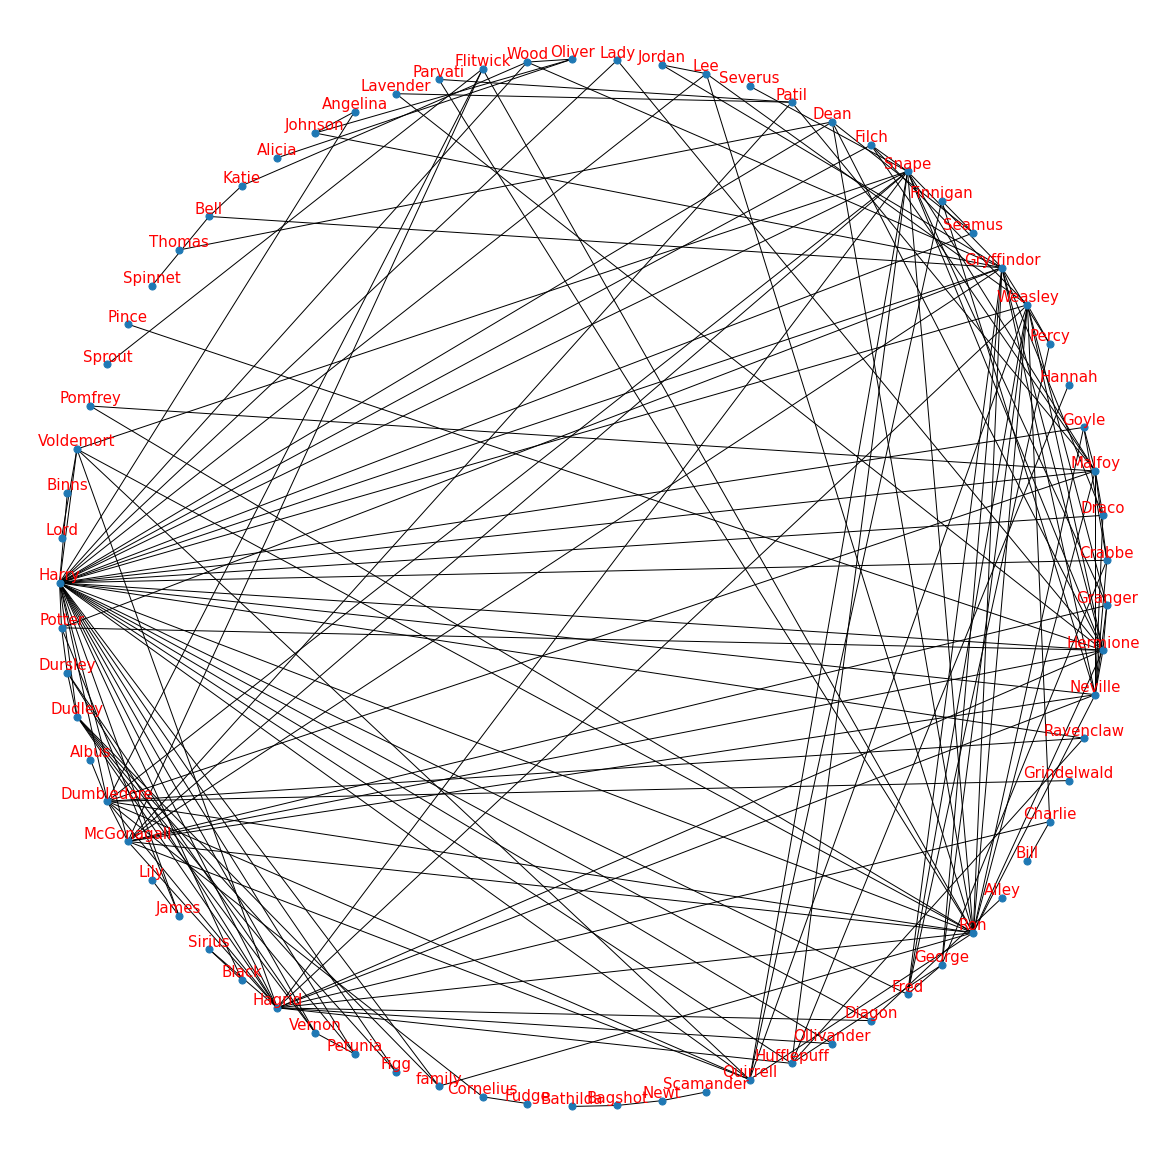

In [33]:
figure(figsize=(16, 16))
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15)


In [ ]:
# Create a new Graph object

In [34]:
G1_new = nx.Graph()

In [ ]:
# Add nodes to the Graph

In [35]:
for entities in entities_cleaned:
    G1_new.add_nodes_from(entities)

In [ ]:
# Add edges to the nodes, with a try/except block to add weights

In [41]:
for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1_new.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1_new[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1_new[entities[i]][entities[i+1]]['weight'] = 1
            
                

In [ ]:
# Check the weight between Harry and Hagrid nodes

In [42]:
G1_new['Harry']['Hagrid']['weight']

8.600000000000001

In [ ]:
# Get all weights from the edges

In [44]:
G1_new_allweights=nx.get_edge_attributes(G1_new, 'weight')

In [ ]:
# Get a list of weights

In [49]:
values= G1_new_allweights.values()
values_list=list(values)

In [ ]:
# Plot network graph with weights

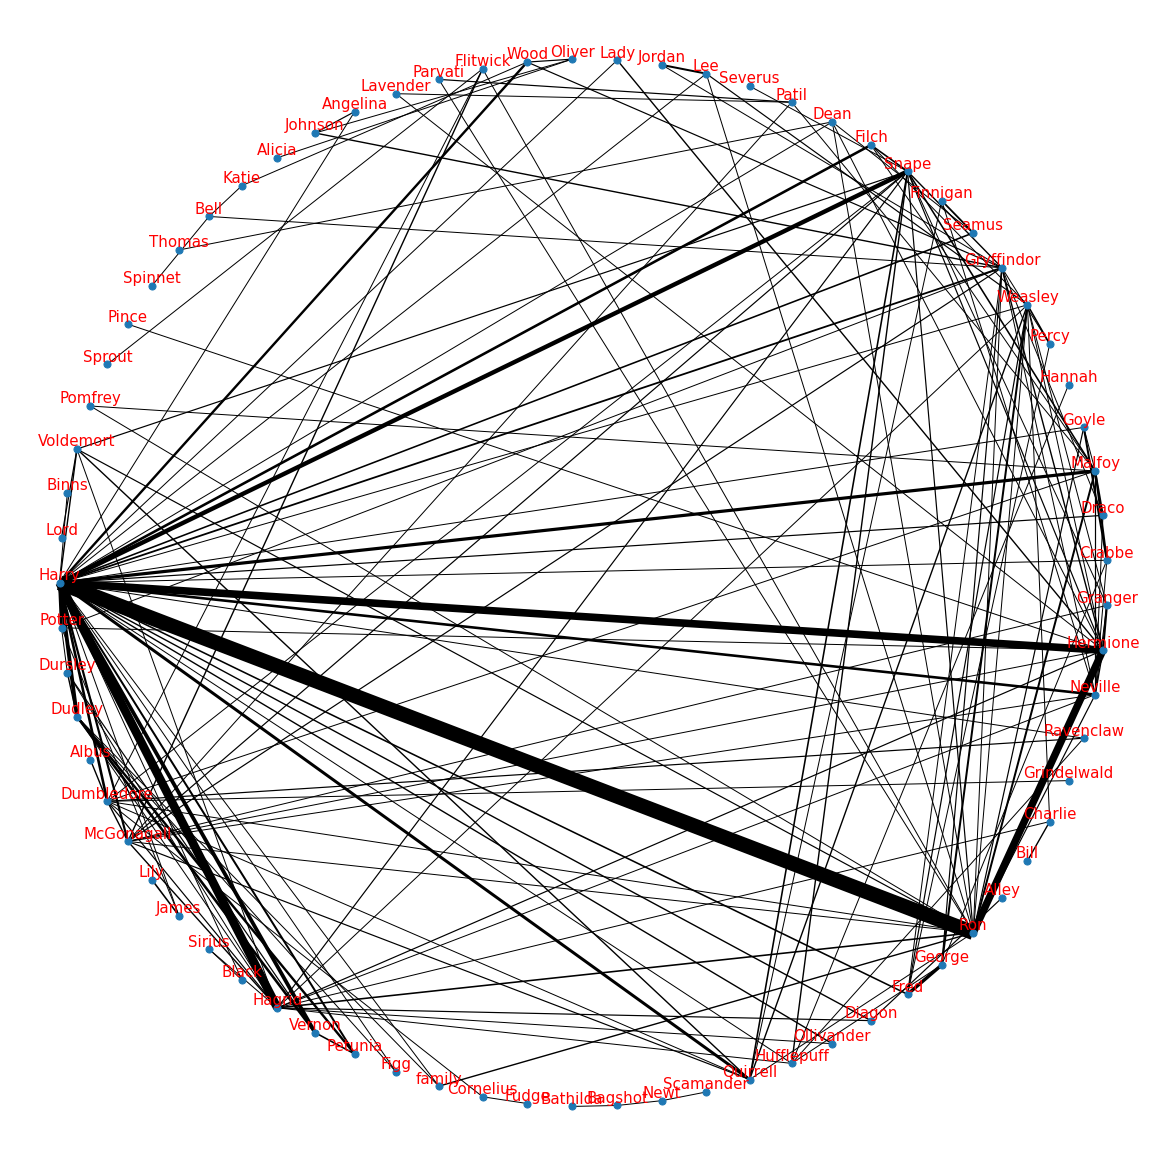

In [52]:
figure(figsize=(16, 16))
nx.draw_shell(G1_new, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("Book1.png", format="PNG")

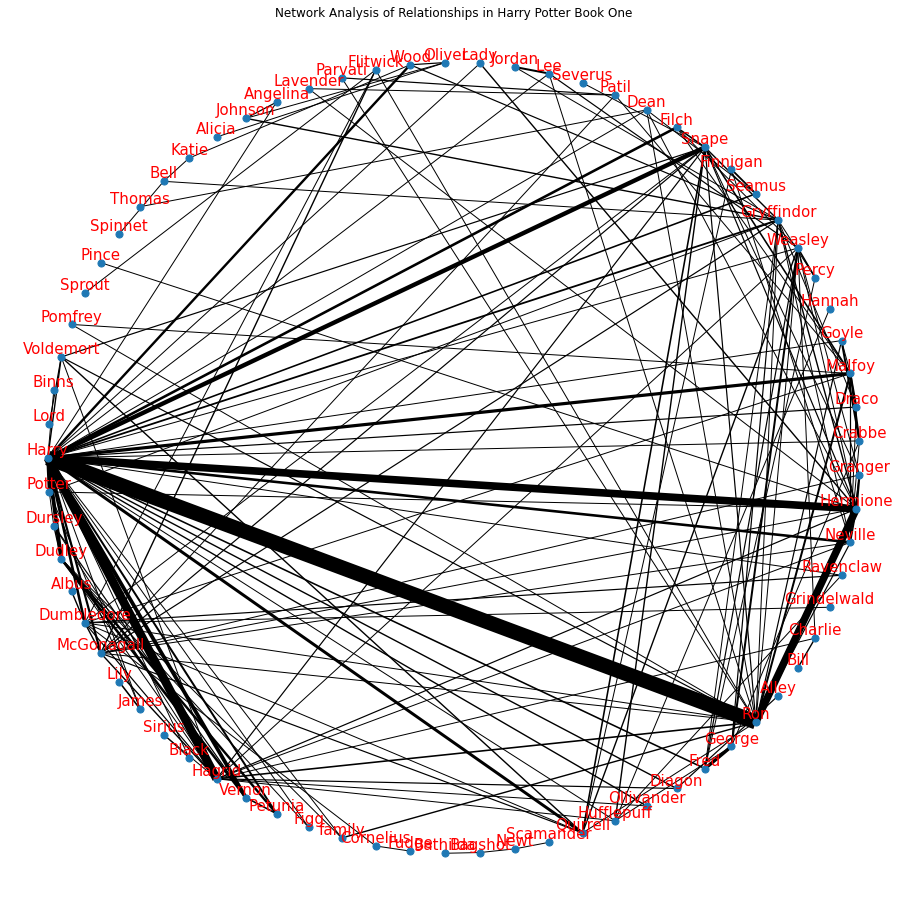

In [78]:
#For Book 1 (Repeating the standard steps)

# Get Book 1 text
text1=df['full_text'][0]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


# Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
# Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book One")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook1.png", format="PNG")

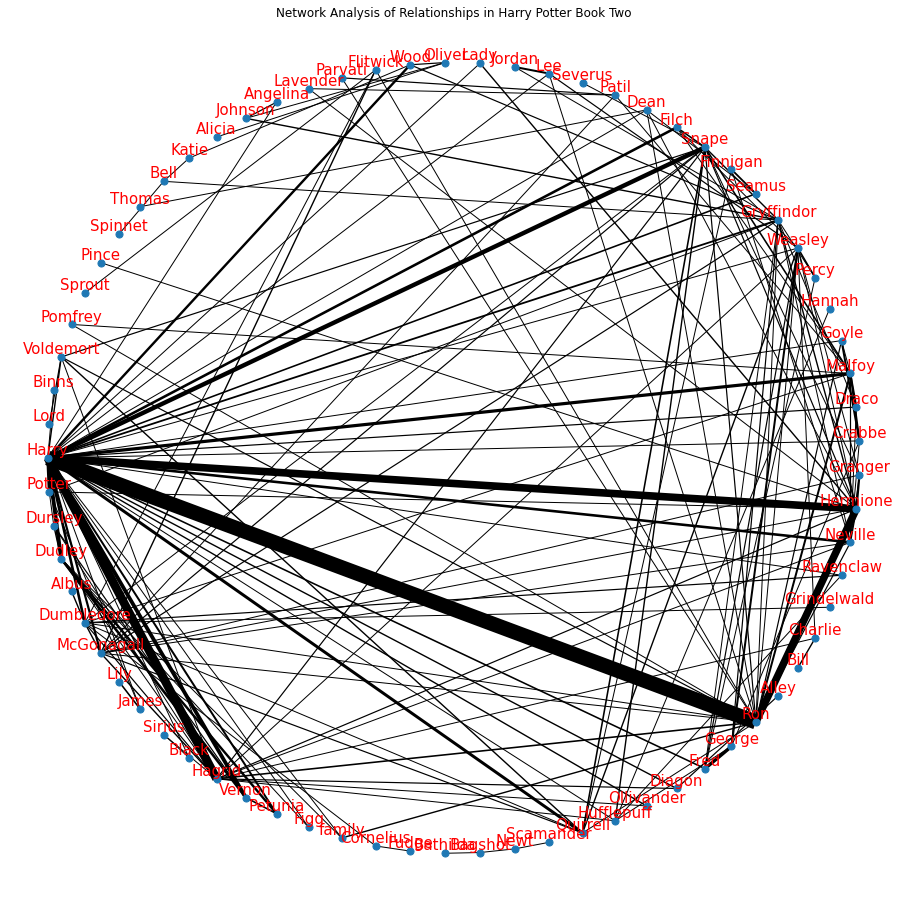

In [79]:
#For Book 2

# Get Book 2 text
text2=df['full_text'][1]

# Split the full text into sentences
sent_text2=sent_tokenize(text2)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G2 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G2.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G2.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G2[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G2[entities[i]][entities[i+1]]['weight'] = 1    
                
# Get all weights from the edges

G2_new_allweights=nx.get_edge_attributes(G2, 'weight')   


# Get a list of weights

values= G2_new_allweights.values()
values_list=list(values)

#Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Two")
nx.draw_shell(G2, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook2.png", format="PNG")           

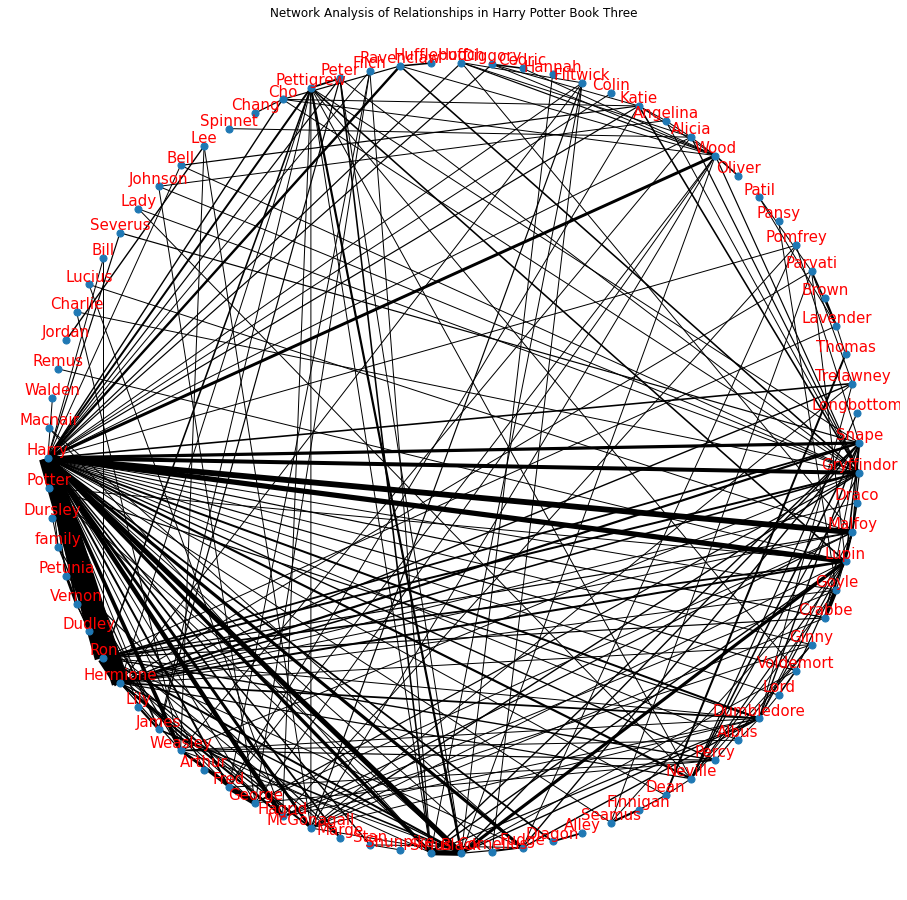

In [80]:
#For Book 3

# Get Book 3 text
text1=df['full_text'][2]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


# Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
# Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Three")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook3.png", format="PNG")  

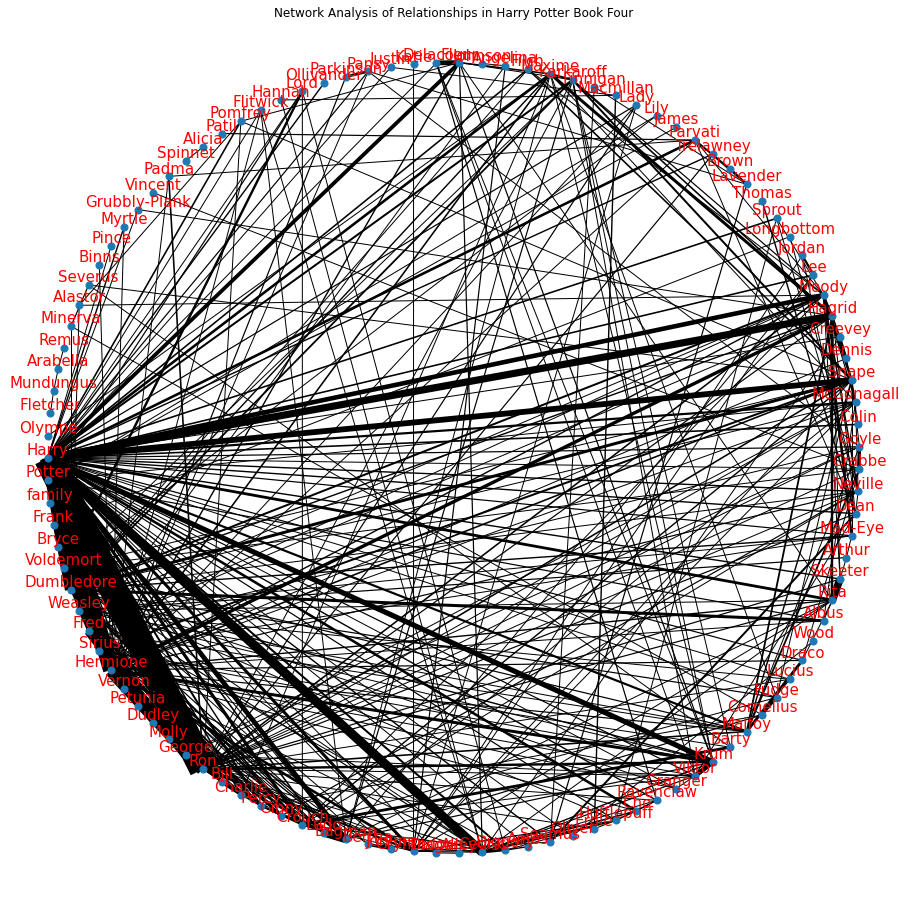

In [81]:
#For Book 4

# Get Book 4 text
text1=df['full_text'][3]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


# Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
# Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Four")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook4.png", format="PNG")  

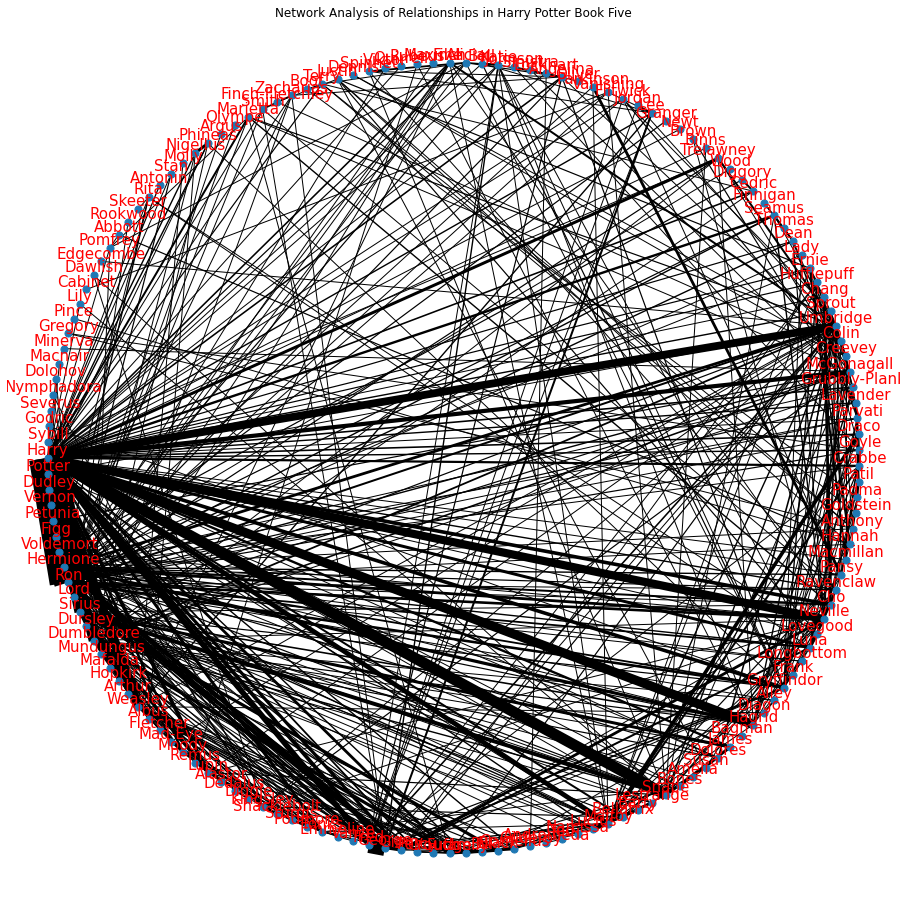

In [82]:
#For Book 5

# Get Book 5 text
text1=df['full_text'][4]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

#  Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
#  Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


#  Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
#  Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Five")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook5.png", format="PNG")  

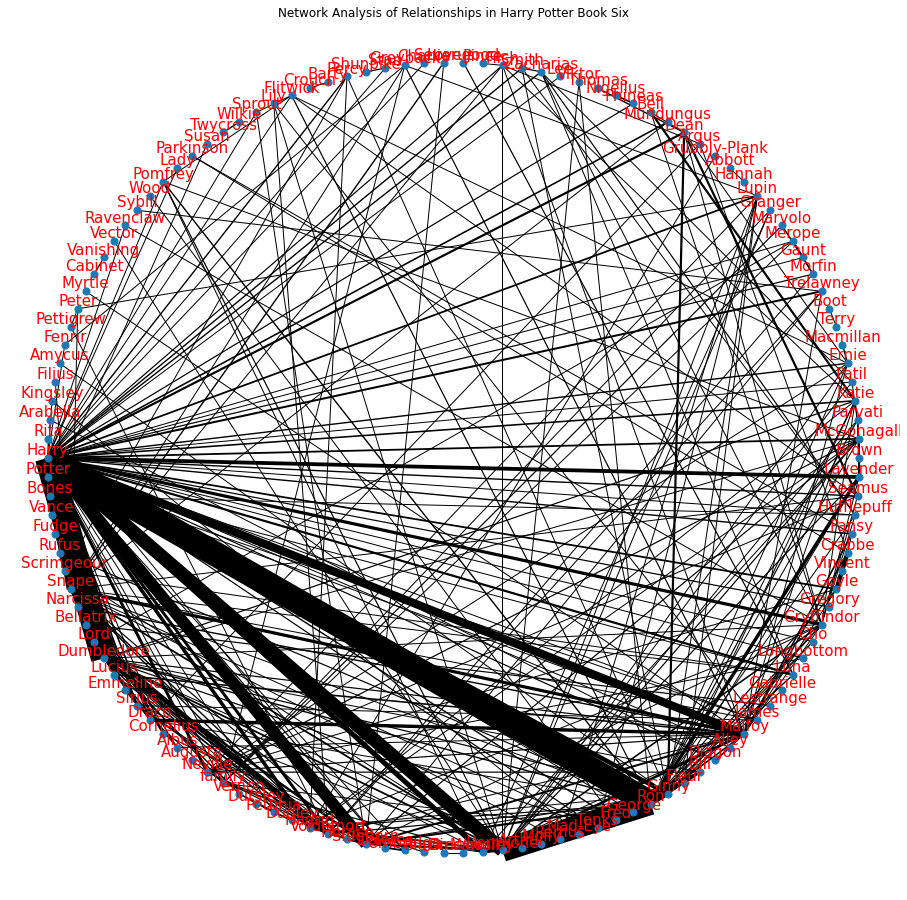

In [83]:
#For Book 6

# Get Book 6 text
text1=df['full_text'][5]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

#  Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


# Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
# Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Six")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook6.png", format="PNG")  

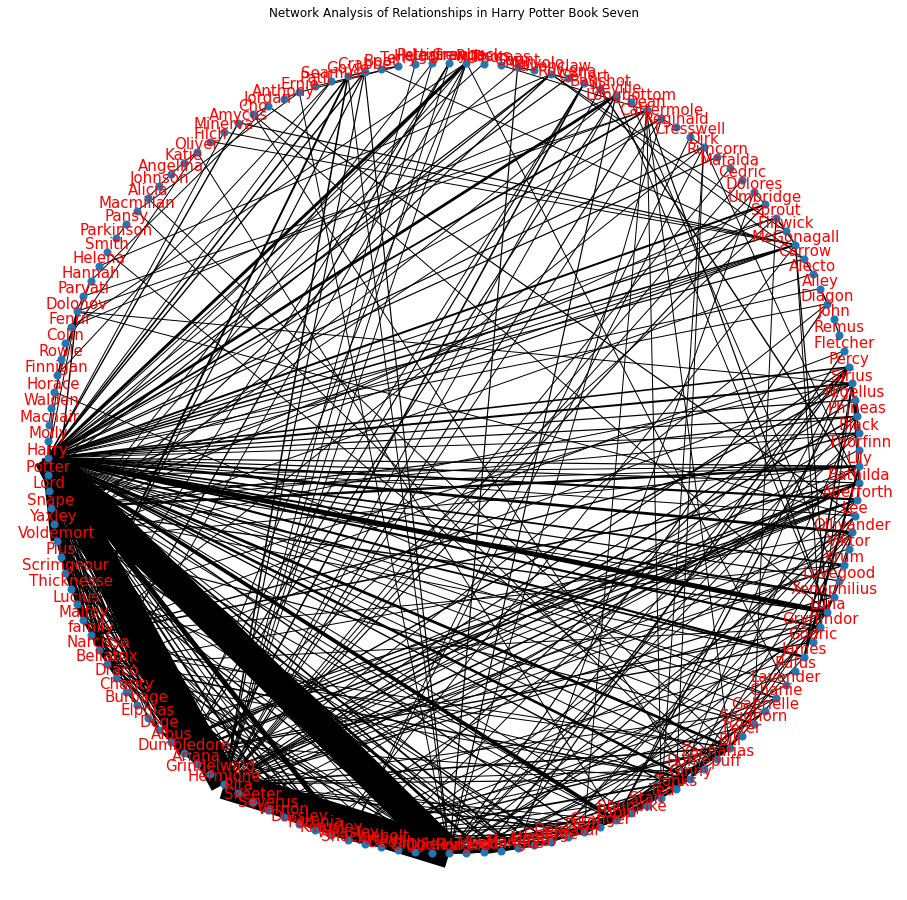

In [84]:
#For Book 7

# Get Book 7 text
text1=df['full_text'][6]

# Split the full text into sentences
sent_text1=sent_tokenize(text1)

# Extract entities from the sentences

entities = []
for article in sent_text1:
    tokens = article.split(" ")
    gpe_list = []
    for ent in tokens:
        if ent in parsed_characters_newlist :
            gpe_list.append(ent)
    entities.append(gpe_list)

# Clean your list of entities

entities_cleaned=[x for x in entities if len(x)>1]

# Create a Graph object

G1 = nx.Graph()

# Add nodes into the graph

for entities in entities_cleaned:
    G1.add_nodes_from(entities)
    
# Add edges to the graph with weights 

for entities in entities_cleaned:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G1.add_edges_from([(str(entities[i]),str(entities[i+1]))])
           try:
                G1[entities[i]][entities[i+1]]['weight'] += 0.2
           except:
                G1[entities[i]][entities[i+1]]['weight'] = 1

                
# Get all weights from the edges

G1_new_allweights=nx.get_edge_attributes(G1, 'weight')   


# Get a list of weights

values= G1_new_allweights.values()
values_list=list(values)
	
# Plot network graph with weights and save the image

figure(figsize=(16, 16))
plt.title ("Network Analysis of Relationships in Harry Potter Book Seven")
nx.draw_shell(G1, node_size=50,with_labels = True,verticalalignment = 'bottom',font_color = 'red',font_size = 15,width=values_list)
plt.savefig("HarryPotterBook7.png", format="PNG") 

In [ ]:
# Import imageio

In [85]:
import imageio

In [ ]:
# lmplement the gif creator 

In [86]:
# Build GIF
with imageio.get_writer('Harry_Potter_Book_NetworkGraph.gif', mode='I') as writer:
    for filename in ['HarryPotterBook1.png', 'HarryPotterBook2.png', 'HarryPotterBook3.png', 'HarryPotterBook4.png','HarryPotterBook5.png','HarryPotterBook6.png','HarryPotterBook7.png']:
        image = imageio.imread(filename)
        writer.append_data(image)

In [ ]:
# Slow down the gif, with fps=0.75 

In [87]:
gif_original = 'Harry_Potter_Book_NetworkGraph.gif'
gif_speed_up = 'Harry_Potter_Book_NetworkGraph_slow.gif'

gif = imageio.mimread(gif_original)

imageio.mimsave(gif_speed_up, gif, fps=0.75)